![](https://i.imgur.com/s1DnN8B.png)
![](https://i.imgur.com/K5lmCwk.png)

## What is the Sigmoid function?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from sympy import lambdify

In [2]:
# Define the function
f_x = 1 / (1 + np.e ** (-x))
f_fcn = lambdify(x, f_x)

In [3]:
# Making data
x = np.linspace(-10, 10, 500)
y = f_fcn(x)

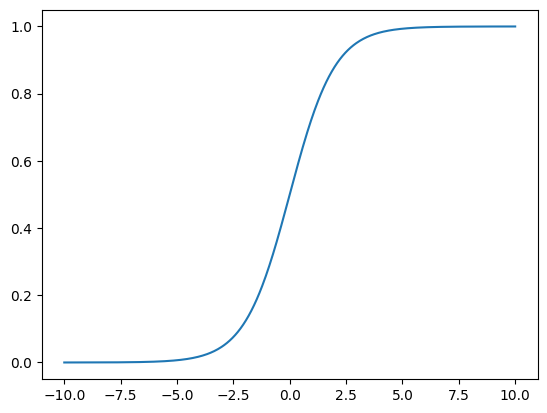

In [4]:
# Plot
plt.plot(x, y)
plt.show()

对于Sigmoid函数$\sigma( t )$，其值域范围在(0, 1)。当x>0时，p>0.5；t<0时，p<0.5。

$$\sigma( t ) = \frac { 1 } { 1 + e ^ { - t } }$$

$$\left. \begin{array}  { l  }  {\hat p = \sigma ( \theta ^ { T } \cdot x _ { b } ) = \frac { 1 } { 1 + e ^ { - \theta ^ T \cdot x_b } } } \\ { \quad \hat y = \{ \begin{array}  { l  }  { 1 , } & { \hat p \geq 0.5 } \\ { 0 , } & {\hat p \leq 0.5 } \end{array} } \end{array} \right.$$

问题：对于给定的样本数据集X，y，我们如何找到参数theta，使得用这样的方式，可以最大程度获得样本数据集X，对应的分类输出y？

## Getting the gradient in Logistic regression.
![](https://i.imgur.com/9SFxH9u.png)

## 实现逻辑回归算法

In [5]:
class LogisticRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], 'The size of X_train and y_train must be equal!'
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = self.gradient_descent(X_b, y_train, initial_theta, eta, n_iters)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    def gradient_descent(self, X_b, y, initial_theta, eta, n_iters=1e6, epsilon=1e-8):
        theta = initial_theta
        cur_iter = 0

        while cur_iter < n_iters:
            gradient = self._dj(theta, X_b, y)
            last_theta = theta
            theta -= eta * gradient
            if abs(self._j(theta, X_b, y) - self._j(last_theta, X_b, y)) < epsilon:
                break

            cur_iter += 1

        return theta

    def _dj(self, theta, X_b, y):
        return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(X_b)

    def _j(self, theta, X_b, y):
        y_hat = self._sigmoid(X_b.dot(theta))
        try:
            return - np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y)
        except:
            return np.inf

    @staticmethod
    def _sigmoid(t):
        return 1 / (1 + np.exp(-t))

    def predict_pro(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, 'You must fit your data firstly!'
        assert X_predict.shape[1] == len(self.coef_), 'The feature number of X_predict must be queal to X_train!'

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        pro = self.predict_pro(X_predict)
        return np.array(pro >= 0.5, dtype='int')

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return self.accuracy_score(y_test, y_predict)

    @staticmethod
    def accuracy_score(y_true, y_predict):
        """计算y_true和y_predict之间的准确率"""
        assert len(y_true) == len(y_predict), \
            "the size of y_true must be equal to the size of y_predict"

        return np.sum(y_true == y_predict) / len(y_true)

    def __repr__(self):
        return 'LogisticRegression()'

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [7]:
# 逻辑回归只能解决二分类问题，过滤数据
X = X[y < 2, :2]
y = y[y < 2]
X.shape, y.shape

((100, 2), (100,))

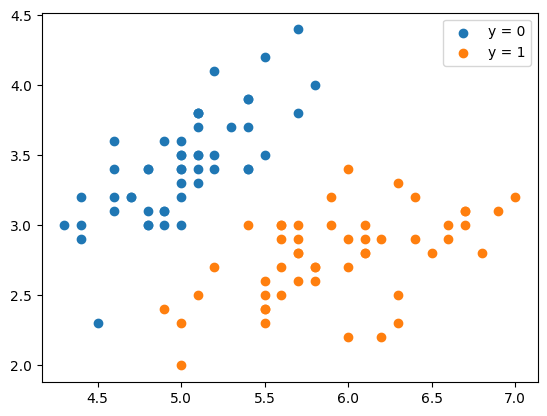

In [8]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y = 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y = 1')
plt.legend()
plt.show()

In [9]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
log_reg_er = LogisticRegression()
log_reg_er.fit(X_train, y_train)
log_reg_er.score(X_test, y_test)

0.4

In [11]:
log_reg_er.predict_pro(X_test)

array([0.50578008, 0.50529064, 0.5046232 , 0.50445122, 0.50457071,
       0.50418024, 0.5046727 , 0.50607153, 0.50637449, 0.50527014,
       0.50494367, 0.5046697 , 0.50455621, 0.50457071, 0.50593156,
       0.50491468, 0.50528764, 0.5046582 , 0.50523214, 0.50445422,
       0.50455321, 0.50499617, 0.50637449, 0.50657845, 0.50423273])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [13]:
log_reg_er.coef_, log_reg_er.intercept_

(array([ 0.00408, -0.0007 ]), 0.0003333333333333333)

## 决策边界

In [14]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)
KNN_classifier.score(X_test, y_test)

1.0

C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


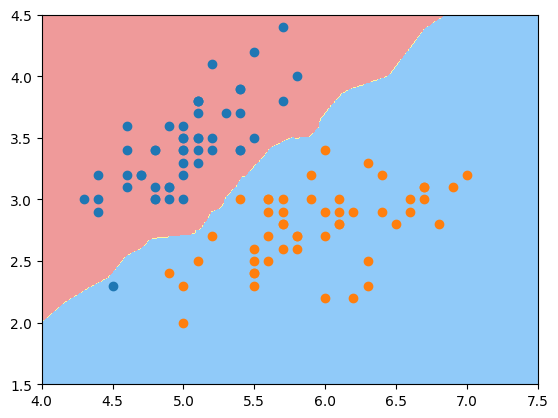

In [16]:
plot_decision_boundary(KNN_classifier, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


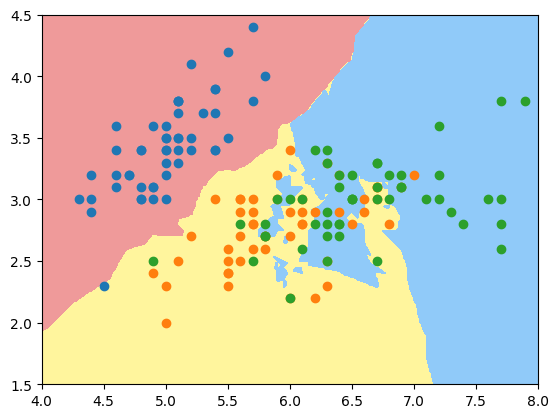

In [17]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(iris['data'][:, :2], iris['target'])
plot_decision_boundary(KNN_classifier, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris['data'][iris['target'] == 0, 0], iris['data'][iris['target'] == 0, 1])
plt.scatter(iris['data'][iris['target'] == 1, 0], iris['data'][iris['target'] == 1, 1])
plt.scatter(iris['data'][iris['target'] == 2, 0], iris['data'][iris['target'] == 2, 1])
plt.show()

C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


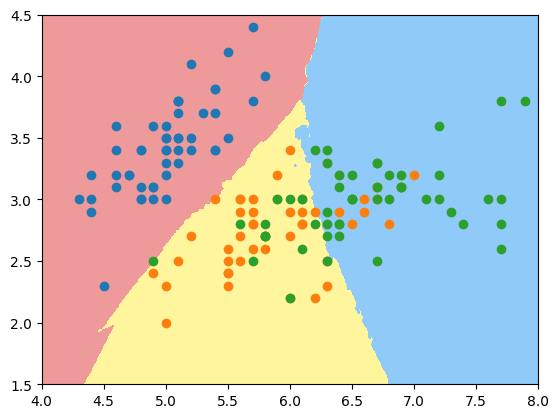

In [18]:
KNN_classifier = KNeighborsClassifier(n_neighbors=50)
KNN_classifier.fit(iris['data'][:, :2], iris['target'])
plot_decision_boundary(KNN_classifier, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris['data'][iris['target'] == 0, 0], iris['data'][iris['target'] == 0, 1])
plt.scatter(iris['data'][iris['target'] == 1, 0], iris['data'][iris['target'] == 1, 1])
plt.scatter(iris['data'][iris['target'] == 2, 0], iris['data'][iris['target'] == 2, 1])
plt.show()

## 在逻辑归回中使用多项式回归

In [19]:
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] ** 2 < 1.5, dtype='int_')

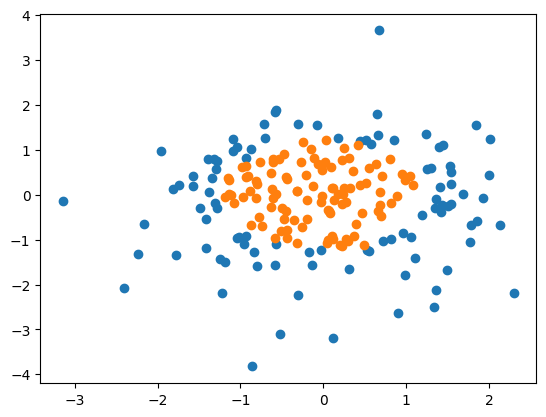

In [20]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## sklearn中的逻辑回归

In [21]:
# 生成数据
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype='int_')

# 生成噪音数据
for _ in range(20):
    y[np.random.randint(200)] = 1

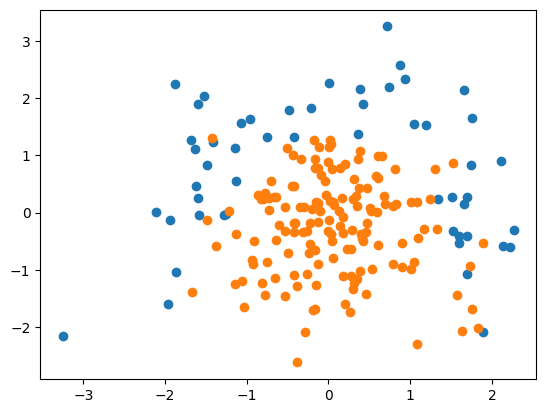

In [22]:
# Plot
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg_er = LogisticRegression()
log_reg_er.fit(X_train, y_train)

LogisticRegression()

In [25]:
log_reg_er.score(X_train, y_train)

0.84

In [26]:
log_reg_er.score(X_test, y_test)

0.84

C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


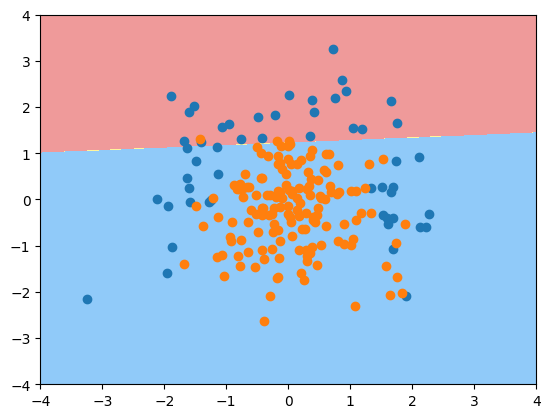

In [27]:
plot_decision_boundary(log_reg_er, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def get_polynomial_logistic_regression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])


poly_log_reg_er = get_polynomial_logistic_regression(2)
poly_log_reg_er.fit(X_train, y_train)
poly_log_reg_er.score(X_train, y_train)

0.92

In [29]:
poly_log_reg_er.score(X_test, y_test)

0.9

C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


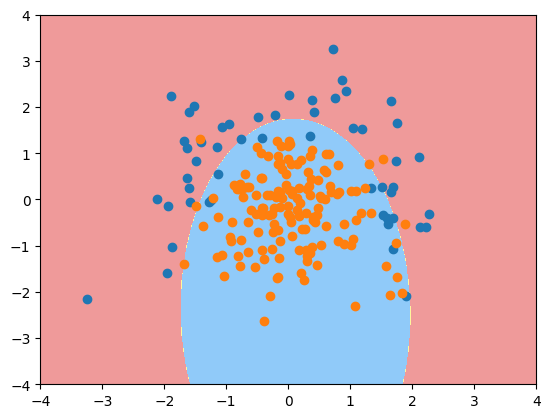

In [30]:
plot_decision_boundary(poly_log_reg_er, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

0.9333333333333333 0.88


C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


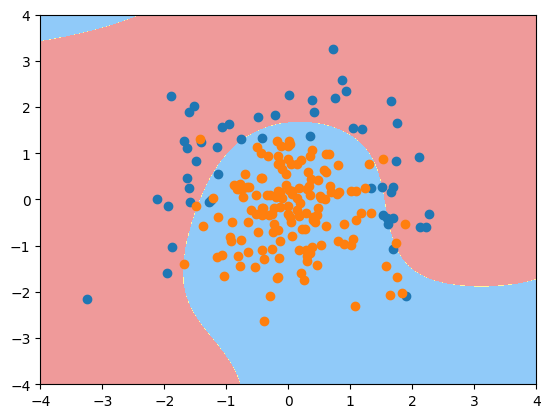

In [31]:
poly_log_reg_er = get_polynomial_logistic_regression(20)
poly_log_reg_er.fit(X_train, y_train)
print(
    poly_log_reg_er.score(X_train, y_train),
    poly_log_reg_er.score(X_test, y_test)
)
plot_decision_boundary(poly_log_reg_er, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

0.9333333333333333 0.88


C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


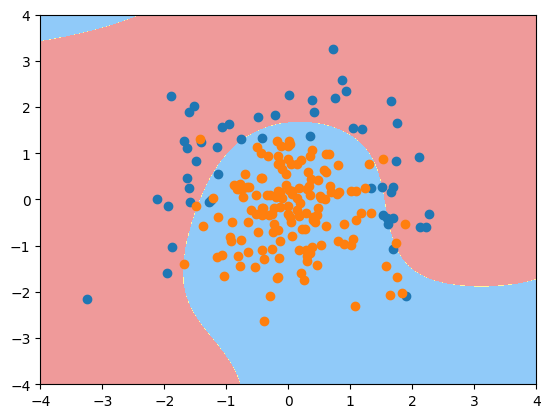

In [32]:
def get_polynomial_logistic_regression(degree, c):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=c))
    ])


poly_log_reg_er = get_polynomial_logistic_regression(20, 1)
poly_log_reg_er.fit(X_train, y_train)
print(
    poly_log_reg_er.score(X_train, y_train),
    poly_log_reg_er.score(X_test, y_test)
)
plot_decision_boundary(poly_log_reg_er, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

0.9333333333333333 0.86


C:\Users\myxc\AppData\Local\Temp\ipykernel_17480\3126695187.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


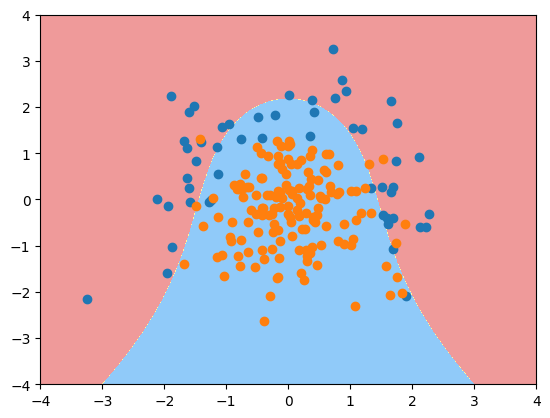

In [33]:
def get_polynomial_logistic_regression(degree, C, penalty):
    return Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver='liblinear'))
    ])


poly_log_reg_er = get_polynomial_logistic_regression(20, .1, 'l1')
poly_log_reg_er.fit(X_train, y_train)
print(
    poly_log_reg_er.score(X_train, y_train),
    poly_log_reg_er.score(X_test, y_test)
)
plot_decision_boundary(poly_log_reg_er, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

![](https://i.imgur.com/RlaDhJh.png)

## OvR(One vs Rest)与OvO(One vs One)

In [34]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [35]:
log_reg_er = LogisticRegression()
log_reg_er.fit(X_train, y_train)

LogisticRegression()

In [36]:
log_reg_er.score(X_test, y_test)

1.0

In [37]:
plot_decision_boundary(log_reg_er, axis=[-5, 8, 2, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

In [ ]:
log_reg_er.predict()